# Polynomial Regression

In [8]:
import numpy as np


def regress_against_polynomial(S: np.ndarray, k: int) -> np.ndarray:
    M = np.zeros((k + 1, k + 1))
    b = np.zeros(k + 1)
    for xi, yi in S:
        powers_of_xi = np.power(xi, np.arange(k + 1))
        M_i = np.outer(powers_of_xi, powers_of_xi)

        M += M_i
        b += yi * powers_of_xi

    alpha = np.linalg.solve(M, b)
    return alpha


def print_polynomial(alpha):
    n_coeffs = len(alpha)
    polynomial_expression = " + ".join([f"{a_i} x^{n_coeffs - i - 1}" for i, a_i in enumerate(reversed(alpha))])
    print(f"f(x) = {polynomial_expression}")

In [9]:
k = 2  # degree of the polynomial to regress against
S = np.array([[-2, -4], [0, 2], [2, +3], [5, 6], [-8, 10]])  # data points

alpha = regress_against_polynomial(S, k)
print_polynomial(alpha)

f(x) = 0.21150792113723516 x^2 + 0.45949374443196345 x^1 + -0.42755742340318376 x^0


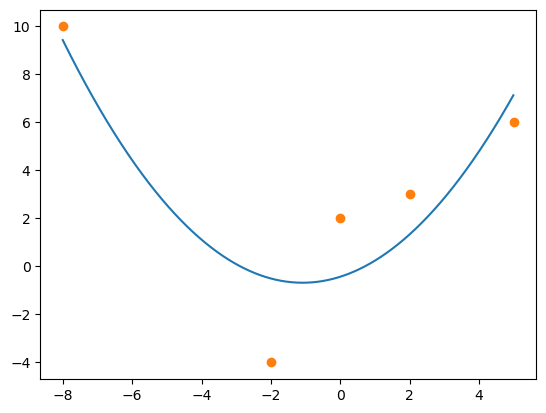

In [10]:
# Let's plot the regression curve and the data points and compare
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3

mpld3.enable_notebook()


def plot_polynomial(alpha: np.ndarray, min_x=-1, max_x=1, precision=0.1, color=None, label=None):
    x = np.arange(min_x, max_x, precision)
    powers_of_x = np.power(x[:, np.newaxis], np.arange(len(alpha)))
    y = np.dot(powers_of_x, alpha)

    plt.plot(x, y, color=color, label=label)


xs, ys = S[:, 0], S[:, 1]
plot_polynomial(alpha, min_x=min(xs), max_x=max(xs), precision=0.01)
plt.plot(S[:, 0], S[:, 1], 'o')

plt.show()

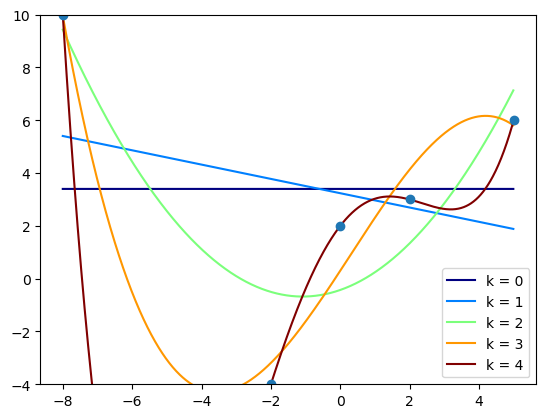

In [11]:
from matplotlib.pyplot import get_cmap

k_max = 5

cmap = get_cmap('jet', k_max)
for k in range(k_max):
    alpha = regress_against_polynomial(S, k)
    plot_polynomial(alpha, min_x=min(xs), max_x=max(xs), precision=.01,
                    label=f'k = {k}', color=cmap(k))
plt.plot(S[:, 0], S[:, 1], 'o')
plt.ylim((min(ys), max(ys)))
plt.legend()
plt.show()